In [1]:
import ROOT
import math

ROOT.gROOT.Macro("rootlogon.C")
ROOT.gStyle.SetOptStat(000000)

Welcome to JupyROOT 6.10/04


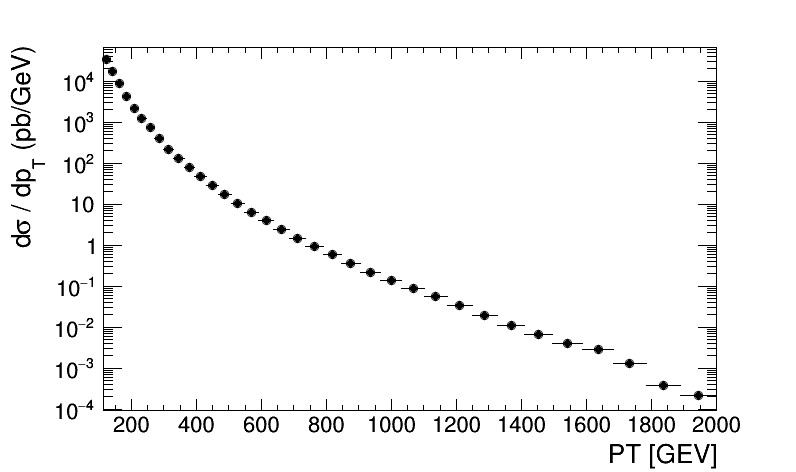

In [2]:
f = ROOT.TFile("HEPData-ins1459051-v1-root.root")

c1 = ROOT.TCanvas("c1", "c1")
hists = []

# Eta bins from the HEPData tables
w_eta = [ 0.5, 0.5, 0.5, 0.5, 0.5 ]

for i in xrange(1,6):
    h1 = f.Get("Table " + str(i) +"/Hist1D_y1").Clone('h1_' + str(i))
    h2 = f.Get("Table " + str(i) +"/Hist1D_y1_e2").Clone('h2_' + str(i))
    
    for ibin in xrange(0,h1.GetNbinsX()+1):
        h1.SetBinError(ibin, h2.GetBinContent(ibin))
    h1.Scale( 2 * w_eta[i-1] )
    hists.append(h1)



for ipt in xrange(1,hists[0].GetNbinsX()) :
    val = hists[0].GetBinContent(ipt)
    err = hists[0].GetBinError(ipt)
    for ieta in xrange(1,len(hists)):
        if ipt < hists[ieta].GetNbinsX() : 
            val += hists[ieta].GetBinContent(ipt)
            err += hists[ieta].GetBinError(ipt) 
    hists[0].SetBinContent( ipt, val )
    hists[0].SetBinError( ipt, err )
    

hists[0].SetTitle('')
hists[0].GetYaxis().SetTitle("d#sigma / dp_{T} (pb/GeV)")
hists[0].GetYaxis().SetTitleOffset(1.0)
hists[0].Draw('e')
c1.SetLogy()
c1.Draw()

    200  : AK7 = 2.22e+03+-1.96e+02  AK8 = 1.27e+03+-1.63e+02, ratio =    1.75, errratio =   0.69
    300  : AK7 = 2.19e+02+-2.03e+01  AK8 = 2.99e+02+-3.46e+01, ratio =    0.73, errratio =   0.80
    400  : AK7 = 4.66e+01+-4.47e+00  AK8 = 5.16e+01+-6.11e+00, ratio =    0.90, errratio =   0.81
    500  : AK7 = 1.71e+01+-1.68e+00  AK8 = 1.24e+01+-1.45e+00, ratio =    1.38, errratio =   0.84
   1000  : AK7 = 1.38e-01+-1.56e-02  AK8 = 8.68e-02+-1.12e-02, ratio =    1.59, errratio =   0.88
   1200  : AK7 = 3.33e-02+-3.95e-03  AK8 = 2.36e-02+-3.39e-03, ratio =    1.41, errratio =   0.82


Info in <TCanvas::Print>: png file compare_smp15007_smp16010.png has been created
Info in <TCanvas::Print>: pdf file compare_smp15007_smp16010.pdf has been created


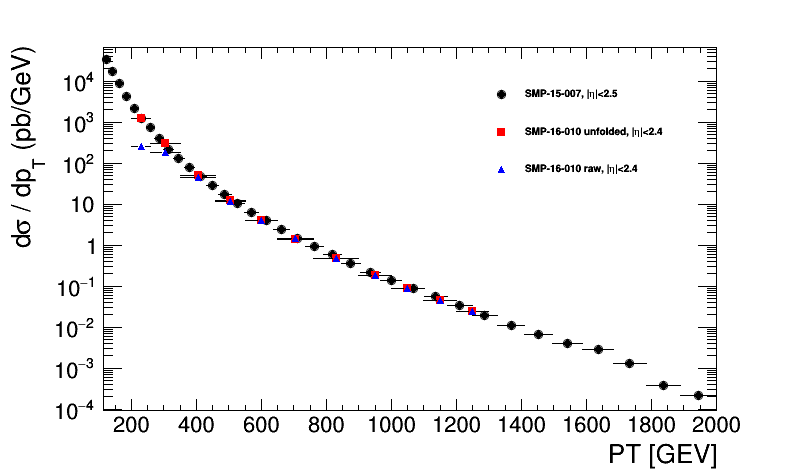

In [3]:
f2 = ROOT.TFile("pt_xs.root")


unfoldedfile = ROOT.TFile('2DData_expunc.root')
datafile = ROOT.TFile('jetht_weighted_dataplots_otherway_rejec.root')


response_sd = unfoldedfile.Get("2d_response_softdrop_nomnom")
response_un = unfoldedfile.Get("2d_response_nomnom")

hreco_sd = response_sd.Hreco()
hreco_un = response_un.Hreco()

data_sd = datafile.Get("PFJet_pt_m_AK8SD")
data_un = datafile.Get("PFJet_pt_m_AK8")


pt_raw_un = data_un.ProjectionY("pt_raw_un")
pt_raw_un.Scale(1.0 / 2300.)

c2d_response_nomnom_ptcanvas = f2.Get("c2d_response_nomnom_ptcanvas")

l = c2d_response_nomnom_ptcanvas.GetPrimitive("padc2d_response_nomnom_ptcanvas1")
h = l.GetPrimitive("2d_response_nomnom_ptplot").Clone("ours")
#h = response_un.Hreco().ProjectionY("ours")

for hist in [pt_raw_un]:
    for ibin in xrange(hist.GetNbinsX()):
        val = hist.GetBinContent(ibin)
        err = hist.GetBinError(ibin)
        wid = hist.GetBinWidth(ibin)
        hist.SetBinContent(ibin, val/wid)
        hist.SetBinError(ibin, err/wid)

h.SetMarkerStyle(21)
h.SetMarkerColor(2)

pt_raw_un.SetMarkerStyle(22)
pt_raw_un.SetMarkerColor(4)

c2 = ROOT.TCanvas("c2", "c2")
hists[0].Draw()   
h.Draw('e same')
pt_raw_un.Draw("e same")

leg = ROOT.TLegend(0.6, 0.6, 0.84, 0.84)
leg.SetFillColor(0)
leg.SetBorderSize(0)
leg.AddEntry( hists[0], "SMP-15-007, |#eta|<2.5", 'p')
leg.AddEntry( h, "SMP-16-010 unfolded, |#eta|<2.4", 'p')
leg.AddEntry( pt_raw_un, "SMP-16-010 raw, |#eta|<2.4", 'p')
leg.Draw()

c2.SetLogy()
c2.Draw()
c2.Print("compare_smp15007_smp16010.png", "png")
c2.Print("compare_smp15007_smp16010.pdf", "pdf")


for testbin in [200, 300, 400, 500, 1000, 1200]:
    bin_1 = hists[0].GetXaxis().FindBin(testbin)
    bin_2 = h.GetXaxis().FindBin(testbin)

    val_1 = hists[0].GetBinContent(bin_1)
    val_2 =  h.GetBinContent(bin_2)
    err_1 = hists[0].GetBinError(bin_1)
    err_2 =  h.GetBinError(bin_2)
    
    print ' %6d  : AK7 = %6.2e+-%6.2e  AK8 = %6.2e+-%6.2e, ratio =  %6.2f, errratio = %6.2f' % ( testbin, val_1, err_1, val_2, err_2, val_1/val_2, (err_1/val_1)/(err_2/val_2) )
